In [57]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../python')
from measurements import *

import h5py

plotter = Plotter()

from scipy.optimize import curve_fit

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Critical line

In [175]:
data1 = ConfResults(fn="../data/zcritical_N048_m-0482300_h002000_c00500.h5",thTime=400,dt=0.8, data_format="new")
dt=0.8

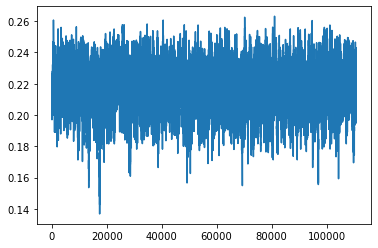

In [8]:
data1.readAv()
dt = 0.8
t=np.arange(len(data1.phi)) * dt
plt.figure(1)
plt.plot(t[:],data1.phi[:,0])
plt.show()

In [215]:
data1.computeFourierPropagator("dsigma",decim=1000, errFunc = lambda x: bootstrap(x,100))

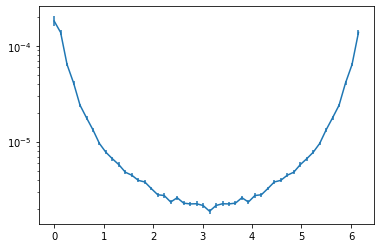

In [177]:
plotter.plot(data1,"propagator", "dsigma")



plt.yscale('log')

In [216]:
data1.computeFourierPropagator("V",decim=1000, errFunc = lambda x: bootstrap(x,100))

(0.0003, 0.0005)

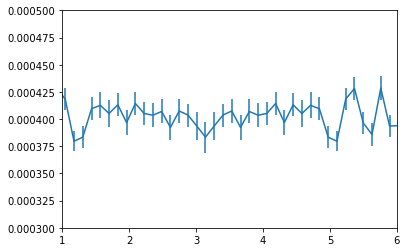

In [179]:
plotter.plot(data1,"propagator", "V")
plt.xlim([1,6])
plt.ylim([3e-4,5e-4])

#plt.yscale('log')

In [140]:
4e-4 * 48**3 / 5.01

8.829700598802397

In [217]:
data1.computeFourierPropagator("phi",decim=1000, errFunc = lambda x: bootstrap(x,100))

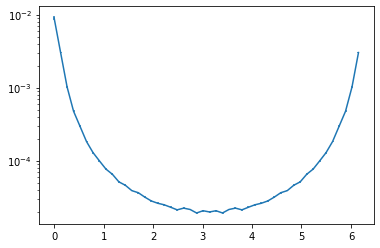

In [181]:
plotter.plot(data1,"propagator", "phi")


plt.yscale('log')

In [218]:
resFit = dict()

In [219]:
fit = lambda x, a , m2 : a / (4.0 * np.sin(x / 2.0)**2 + m2)

In [220]:
kMax = int(len(data1.momenta_3d) )
resFit["phi"] = curve_fit(fit, data1.momenta_3d[:kMax], data1.wallFProp["phi"].mean[:kMax])
resFit["dsigma"] = curve_fit(fit, data1.momenta_3d[:kMax], data1.wallFProp["dsigma"].mean[:kMax])

KeyError: 0

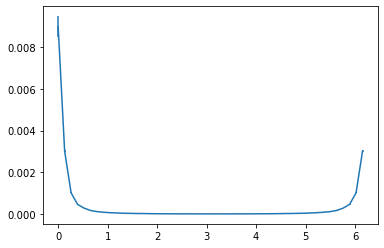

In [185]:
plotter.plot(data1,"propagator", "phi")
plt.plot(data1.momenta_3d[:kMax], fit(data1.momenta_3d[:kMax],resFit[0][0], resFit[0][1]))
plt.yscale('log')
#plt.xlim([0,np.pi])

In [221]:
resFit

{'phi': (array([3.67739844e-06, 9.72153010e-03]),
  array([[1.96252567e-16, 5.83858424e-13],
         [5.83858424e-13, 1.96652363e-09]])),
 'dsigma': (array([2.88733091e-06, 1.16878335e-01]),
  array([[2.07727559e-15, 1.01122316e-10],
         [1.01122316e-10, 5.50420286e-06]]))}

In [222]:
(resFit["dsigma"][0][0]/resFit["phi"][0][0])**0.5

0.8860902069892448

In [224]:
3.67739844e-06*64**3

0.96400793665536

In [223]:
resFit

{'phi': (array([3.67739844e-06, 9.72153010e-03]),
  array([[1.96252567e-16, 5.83858424e-13],
         [5.83858424e-13, 1.96652363e-09]])),
 'dsigma': (array([2.88733091e-06, 1.16878335e-01]),
  array([[2.07727559e-15, 1.01122316e-10],
         [1.01122316e-10, 5.50420286e-06]]))}

In [65]:
2.33e-5 * 48**3

2.5767936000000002

In [60]:
data1.loadAv("phi0")

In [91]:
data1.computeVar("phi0", lambda x, func: jackknife(x, nSamples=10, func=func))

In [93]:
data1.variances["phi0"].err

array([5.48579249e-06])

In [81]:
0.04713266167328617 - data1.meanValues["phi0"].mean**2

0.0002008174696589149

In [211]:
data1 = ConfResults(fn="../data/zminus2_N064_m-0501265_h003684_c00500.h5",thTime=400,dt=0.8, data_format="new")
dt=0.8
data1.directions

['X', 'Y', 'Z']

In [212]:
data1.computeFourierPropagator("A",decim=1000, errFunc = lambda x: bootstrap(x,100))

(1.0, 6.0)

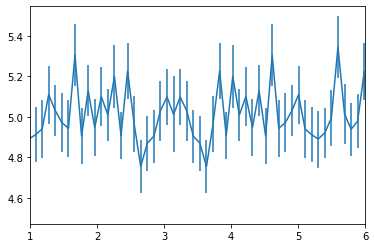

In [214]:
plotter.plot(data1,"propagator", "A", yfact=64**3)
plt.xlim([1,6])
#plt.ylim([40,50])

In [159]:
0.0000473 * 48**3 

5.2310016

# Static coeffs from finite volume

In [111]:
data=dict()
data["32"] = ConfResults(fn="../data/zminus2_N032_m-0501265_h000000_c00500.h5",thTime=400,dt=0.8, data_format="new")
data["64"] = ConfResults(fn="../data/zminus2_N064_m-0501265_h000000_c00500.h5",thTime=400,dt=0.8, data_format="new")


In [124]:
for k in ["32", "64"]:
    data[k].computeMean("phiH0", lambda x, func: bootstrap(x, nSamples=100, func=func))
    data[k].computeVar("phiH0", lambda x, func: bootstrap(x, nSamples=100, func=func))    

In [128]:
for k in ["32", "64"]:
    print(data[k].meanValues["phiH0"].err)    
    print(data[k].variances["phiH0"].err)

0.0009676963174218419
0.0005342669913804952
0.0005133324399510688
0.0002046379143866748


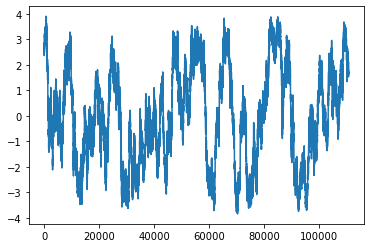

In [132]:
k="32"
data[k].loadAv("phi0")
dt = 0.8
t=np.arange(len(data[k].av["phi0"])) * dt
plt.figure(1)
plt.plot(t[:],data[k].av["phi0"])
plt.show()

In [134]:
plt.savefig('H032.pdf')

<Figure size 432x288 with 0 Axes>

In [135]:
64**3/48**3

2.3703703703703702